KeyboardInterrupt: 

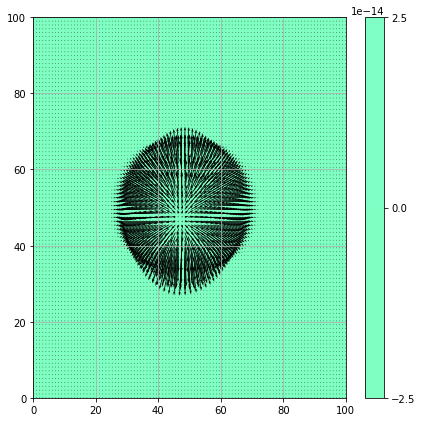

In [3]:
#Fiona Pärli, Fluid simulation with Navier-Stokes's equations, matura paper 2021
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr
import math
%matplotlib inline
from IPython.display import clear_output
from PIL import Image

#Use poisson equations
def poisson(p):
    p[1:-1,1:-1]=((p[1:-1,2:]+p[1:-1,0:-2])*dy**2) + ((p[2:,1:-1]+p[0:-2,1:-1])*dx**2)/2*(dx**2+dy**2) - (rho*dx**2*dy**2)/(2*(dx**2+dy**2)) * 1/dt * ((u[1:-1,2:]-u[1:-1,0:-2])/2*dx)+((v[2:,1:-1]-v[0:-2,1:-1])/2*dy)-((u[1:-1,2:]-u[1:-1,0:-2])/2*dx) *((u[1:-1,2:]-u[1:-1,0:-2])/2*dx) - 2*((u[2:,1:-1]-u[0:-2,1:-1])/2*dy)*((v[1:-1,2:]-v[1:-1,0:-2])/2*dx)-((v[2:,1:-1]-v[2:,1:-1])/2*dy)*((v[2:,1:-1]-v[0:-2,1:-1])/2*dy)
    #boundary conditions
    p[:,-1]=p[:,-2]     #dp/dx = 0, x = 2
    p[:,0]=p[:,1]       #dp/dy = 0, y = 0
    p[0,:]=p[1,:]       #dp/dx = 0, x = 0
    p[-1,:]= 0          #p = 0, y = 2 
    return p

#Use momentum equations
def momentum_eqs(u,v,p):
    un=np.empty_like(u)
    vn=np.empty_like(v)

    un=u.copy()
    vn=v.copy()
    pn=p.copy()

    #u-momentum equation
    u[1:-1,1:-1]=un[1:-1,1:-1]-(un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[1:-1,0:-2]))-(vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[0:-2,1:-1]))-((dt/rho*2*dx)*(pn[1:-1,2:]-pn[1:-1,0:-2])) + (nu*((dt/dx**2)*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])))+((dt/dy**2)*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1]))
    #boundary conditions
    u[0, :]  = 0
    u[:, 0]  = 0
    u[:, -1] = 0
    u[-1, :] = 0
    #v-momentum equation
    v[1:-1,1:-1]=vn[1:-1,1:-1]-(un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[1:-1,0:-2]))-(vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[0:-2,1:-1]))-((dt/rho*2*dy)*(pn[2:,1:-1]-pn[0:-2,1:-1])) + (nu*((dt/dx**2)*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])))+((dt/dy**2)*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1]))
    #boundary conditions
    v[0, :]  = 0
    v[-1, :] = 0
    v[:, 0]  = 0
    v[:, -1] = 0

    return u, v, p

#declare variables
nx = 100                #number of pixels in x-direction
ny = 100                 #number of pixels in y-direction
c= 1                    #wavespeed
dt=0.000001               #timestep length
rho= 1.4                 #density
nu= 100              #viscosity
dx= 2/(nx-1)
dy=2/(nx-1)

#create two-dimensional coordinate system
ix= np.linspace(0,nx,nx)
iy= np.linspace(0,ny,ny)
X,Y=np.meshgrid(ix,iy)

#import and format image
image = Image.open(r"C:\WinPython\notebooks\plots\22_glycerine_midpressure_big\fluid24.png")
image_sequence = image.getdata()
pixels = image.getdata()
pixellist = list(pixels)
pixellist_flat = [x for sets in pixellist for x in sets]
red = pixellist_flat[::3] 
green = pixellist_flat[1::3]-np.ones(len(pixellist_flat)//3)*127 
blue = pixellist_flat[2::3]-np.ones(len(pixellist_flat)//3)*127 
pp = np.array(red)
uu = np.array(green)
vv= np.array(blue)
p = np.reshape(pp,(nx,ny))
u = np.reshape(uu,(nx,ny))
v = np.reshape(vv,(nx,ny))

plot_every = 10

nt = 1000 #number of timesteps
for w in range(nt):
    u,v,p= momentum_eqs(u,v,p)
    p=poisson(p)
    
    #plot
    if w % plot_every ==0:
        clear_output(wait=True)
        fig = plt.figure(figsize=(7,7))
        grid = plt.grid()
        
        plt.contourf(X,Y,p,alpha=0.5,cmap="gist_rainbow")
        plt.colorbar()
        plt.clim(-16,16)
        plt.contour(X,Y,p,cmap="gist_rainbow")
        plt.clim(-16,16)
        
        plt.quiver(X,Y,u,v)
        
        plt.savefig("plots/" + str(w).zfill(3) + ".png")
        
        plt.show()